Data processing complete -- Printing Streamplot Animation


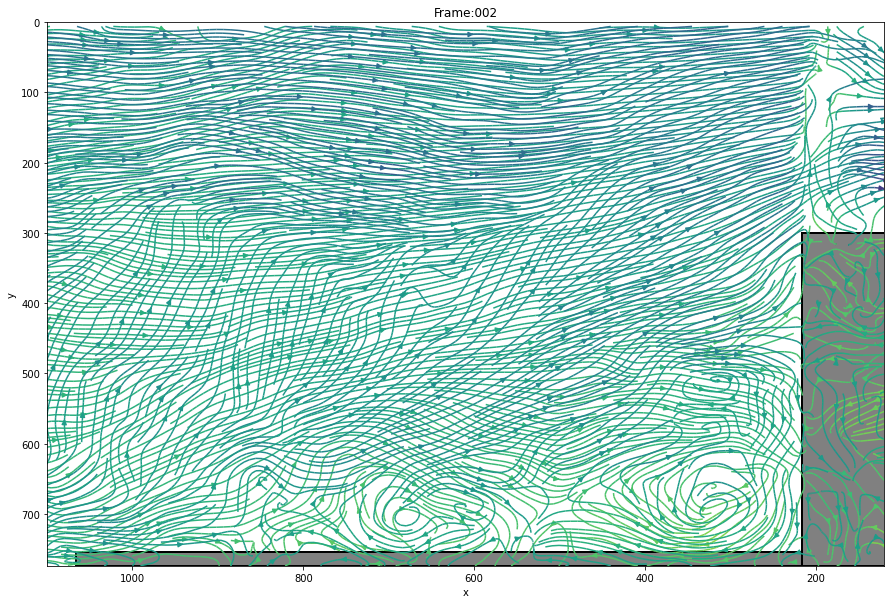

In [4]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib.colors as colors

######################################################## 

#Reading in PIV Vector Data
fileroot = f'{sys.path[0]}/V20_front_01run/PLT_WS24/'
fileprefix = 'B00'
fileext = '.plt'

total_frames=25

# norm = Normalize()
# norm.autoscale(colors)
# # we need to normalize our colors array to match it colormap domain
# # which is [0, 1]

# colormap = cm.RdBu
    
print('Data processing complete -- Printing Streamplot Animation')

######################################################## 

#Function to reset formatting after each frame
def init_func():
    
    ax1.clear()
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.invert_yaxis()
    ax1.invert_xaxis()
    ax1.add_patch(rectu_1)
    ax1.add_patch(rectl_1)
    ax1.set_title("Streamlines") 
    
#Function to animate plot with new after each frame
def update_plot(i):
    
    filenum = '{0:03}'.format(i+1)
    filepath = fileroot + fileprefix + filenum + fileext
    df = pd.read_csv (filepath, sep = " ") 
    shapedf= df.shape[1]

    #The textfiles are not clean and have trailing whitespaces at random files.
    #This if statement will catch the extra whitespace discrepansy in this specific data set and drop columns.
    if shapedf == 5:
        df.drop((df.columns)[[-1,-1]],axis=1,inplace=True)
    elif shapedf == 6:
        df.drop((df.columns)[[-1,-2]],axis=1,inplace=True)

    #Drop last to columns
    df.drop(index=df.index[0:106],inplace=True) #Dropping remaining data to keep reshape intervals constant

    #Append column names
    df.columns = ["x","y","u","v"]
    
    #Flip Orientation of u and v velocity vectors
#     df['u']= df['u']*-1
    df['v']= df['v']*-1
    
    df_u = df['u']
    df_v = df['v']

    #Meshgrid to plot streamline data on image cooridinates
    xstep = np.arange(df['x'].min(),df['x'].max(),12)
    ystep = np.arange(df['y'].min(),df['y'].max(),12)
    xx , yy = np.meshgrid(xstep,ystep)
    
    df_u  = pd.DataFrame(df_u).to_numpy() #no reshape on pd object - so change to np
    df_u = np.reshape(df_u ,(66,107))
    df_u = np.delete(df_u, 65, axis=0) #Deleting 1 row to align shape with meshgrid
    df_u = np.delete(df_u, 106, axis=1) #Deleting 1 col to align shape with meshgrid

    df_v  = pd.DataFrame(df_v).to_numpy() #no reshape on pd object - so change to np
#     print(df_v.shape)
    df_v = np.reshape(df_v ,(66,107))
    df_v = np.delete(df_v, 65, axis=0) #Deleting 1 row to align shape with meshgrid
    df_v = np.delete(df_v, 106, axis=1) #Deleting 1 col to align shape with meshgrid

    df_speed = np.sqrt(pd.DataFrame(df['u']).to_numpy()**2 + pd.DataFrame(df['v']).to_numpy()**2)
#     print(df_speed.shape)
    df_speed = np.reshape(df_speed ,(66,107))
    df_speed = np.delete(df_speed, 65, axis=0) #Deleting 1 row to align shape with meshgrid
    df_speed = np.delete(df_speed, 106, axis=1) #Deleting 1 col to align shape with meshgrid
    
    #Clear Previous Quiver Object
    # ax1.collections = [] # clear lines streamplot
    # ax1.patches = [] # clear arrowheads streamplot
        
    #Add Updated Quiver Instance
    ax1.streamplot(xx,yy,df_u,df_v,density=[4, 5],color=df_u,cmap='viridis')

    ax1.set_xlim(1100,120)
    ax1.set_ylim(774,0)
    ax1.add_patch(rectu_1)
    ax1.add_patch(rectl_1)

    title_str = "Frame:" + filenum                             
    plt.title(title_str)

########################################################     
    
#Creating Animation
#Initialise figure to prepare for animation function
fig, ((ax1)) = plt.subplots(nrows=1, ncols=1,figsize = (15,10))

rectu_1 = patches.Rectangle((6, 300), 210, 474, linewidth=2, edgecolor='black', facecolor='grey')
rectl_1 = patches.Rectangle((216, 754), 850, 20, linewidth=2, edgecolor='black', facecolor='grey')

anim = animation.FuncAnimation(fig,update_plot,frames = total_frames, init_func = init_func)        

#Writing animation to gif file
f = f"{sys.path[0]}/results/piv-front-streamplot.gif" 
writergif = animation.PillowWriter(fps=12) 
anim.save(f, writer=writergif)
